In [1]:
# Install a pip package in the current Jupyter kernel
!python --version
import sys
!{sys.executable} -m pip install numpy pandas matplotlib

Python 3.10.2



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
def resultdir(resultsize, dbsize, index):
    return f"results_N{resultsize}_D{dbsize}_I{index}"

def calculate_mean(q, method,table, resultsize, dbsize, index):
    global resultdirs
    resdir = resultdir(resultsize, dbsize, index)
    #url = f'https://raw.githubusercontent.com/lordpretzel/prov_semanticopt_experiment/master/{resdir}/runtime_{q}_{table}_{method}.csv'
    url = f"./{resdir}/runtime_{q}_{table}_{method}.csv"
    df = pd.read_csv(url, header=None, delimiter=',')
    df = df.set_axis(["time"], axis=1)
    return df['time'].mean()

allmethods = ['flatten', 'unopt', 'unoptheu', 'opt', 'optnoflat', 'optheu']
allqueries = ['01','02','03', '04', '05', '06', '07', '08', '09','10','11', '14', '17', '19', '20'] # ,'02','03']
resultsizes = [ '1' ] #, '10p', '25p', '100p' ]
dbsizes = [ '1GB'] # '10GB' ]    
index = [ 'noindex', 'index' ]
# resultdirs = { x: "results_n1" for x in  ['flatten', 'unopt', 'opt', 'optnoflat'] }
# resultdirs |= { x: "testopt_results" for x in ['unoptheu', 'optheu'] }

queries = {
    "01": ["lineitem"],
    "02": ["nation", "part", "partsupp", "region"],
    "03": ["customer", "lineitem", "orders"],
    "04": ["lineitem"], #"orders"],
    "05": ["customer", "lineitem", "nation", "orders", "region"],
    "06": ["lineitem"],
    "07": ["customer", "lineitem", "nation", "orders", "supplier"],
    "08": ["customer", "nation", "part", "supplier"],
    "09": ["lineitem", "nation", "orders", "part", "partsupp", "supplier"],
    "10": ["customer", "lineitem", "nation", "orders"],
    "11": ["nation", "partsupp", "supplier"],
    "12": ["lineitem", "orders"],
    "13": ["customer", "orders"],
    "14": ["lineitem", "part"],
    "15": ["lineitem", "supplier"],
    "16": ["part", "partsupp", "supplier"],
    "17": ["lineitem", "part"],
    "18": ["customer", "lineitem", "orders"],
    "19": ["lineitem", "part"],
    "20": ["part"],
    }

In [15]:
allresult = {}
for d in dbsizes:
    allresult[d] = {}
    for i in index:
        allresult[d][i] = {}
        for n in resultsizes:
            allresult[d][i][n] = {}
            for q in allqueries: #['01','02', ...
                allresult[d][i][n][q] = {} #has to exist before assigning sub-whatever
                for table in queries[q]: #[part,region, ...]
                    resultsforq = {}
                    for method in allmethods: # ['flatten', 'unopt', 'opt'] 
                        try:
                            mean = calculate_mean(q,method,table,n,d,i)
                            resultsforq[method] = mean
                            #print(resultsforq)
                        except Exception as e:
                            print(f"ERROR DB: {d} [{i}] with numresults {n} for {q} for {table} using {method}:\n\n{e}")
                #print(allresult)
                allresult[d][i][n][q][table] = resultsforq
allresult 

ERROR DB: 1GB [index] with numresults 1 for 07 for nation using unoptheu:

[Errno 2] No such file or directory: './results_N1_D1GB_Iindex/runtime_07_nation_unoptheu.csv'
ERROR DB: 1GB [index] with numresults 1 for 07 for nation using optheu:

No columns to parse from file
ERROR DB: 1GB [index] with numresults 1 for 07 for orders using unoptheu:

[Errno 2] No such file or directory: './results_N1_D1GB_Iindex/runtime_07_orders_unoptheu.csv'
ERROR DB: 1GB [index] with numresults 1 for 07 for orders using optheu:

[Errno 2] No such file or directory: './results_N1_D1GB_Iindex/runtime_07_orders_optheu.csv'


{'1GB': {'noindex': {'1': {'01': {'lineitem': {'flatten': 11366.922,
      'unopt': 11287.823,
      'unoptheu': 11655.459,
      'opt': 11619.783,
      'optnoflat': 10821.883,
      'optheu': 11629.595}},
    '02': {'region': {'flatten': 47634.434,
      'unopt': 55.375,
      'unoptheu': 53.871,
      'opt': 47681.108,
      'optnoflat': 49.574,
      'optheu': nan}},
    '03': {'orders': {'flatten': 5.166,
      'unopt': 5.462,
      'unoptheu': 4.988,
      'opt': 3.226,
      'optnoflat': 3.458,
      'optheu': 3.157}},
    '04': {'lineitem': {'flatten': 1625.439,
      'unopt': 5087.231,
      'unoptheu': 1569.449,
      'opt': 1550.56,
      'optnoflat': 5046.273,
      'optheu': 1559.539}},
    '05': {'region': {'flatten': 505.195,
      'unopt': 504.471,
      'unoptheu': 505.52,
      'opt': 502.581,
      'optnoflat': 504.187,
      'optheu': 505.191}},
    '06': {'lineitem': {'flatten': 1174.831,
      'unopt': 1165.207,
      'unoptheu': 0.258,
      'opt': 1168.928,
    

In [38]:
def dfs_for_experiments(results, methods):
    edfs = {}
    for q in allqueries:
        qdata = results[q]
        qdict = { k: [] for k in usemethods } # allmethods }
        tables = qdata.keys()
        for t in qdata:
            for m in usemethods:
                val = qdata[t][m] if m in qdata[t] else np.nan
                val = val if val > 0.0 else np.nan
                qdict[m] = qdict[m] + [val]
        edfs[q] = pd.DataFrame(data=qdict, index=tables)
        edfs[q] = round(edfs[q],2)
    return edfs
    
dfs = {}
usemethods=allmethods

for d in dbsizes:
    dfs[d] = {}
    for i in index:
        dfs[d][i] = {}
        for n in resultsizes:
            dfs[d][i][n] = {}
            dfs[d][i][n] = dfs_for_experiments(allresult[d][i][n], usemethods)

dfs

{'1GB': {'noindex': {'1': {'01':            flatten     unopt  unoptheu       opt  optnoflat   optheu
    lineitem  11366.92  11287.82  11655.46  11619.78   10821.88  11629.6,
    '02':          flatten  unopt  unoptheu       opt  optnoflat  optheu
    region  47634.43  55.38     53.87  47681.11      49.57     NaN,
    '03':         flatten  unopt  unoptheu   opt  optnoflat  optheu
    orders     5.17   5.46      4.99  3.23       3.46    3.16,
    '04':           flatten    unopt  unoptheu      opt  optnoflat   optheu
    lineitem  1625.44  5087.23   1569.45  1550.56    5046.27  1559.54,
    '05':         flatten   unopt  unoptheu     opt  optnoflat  optheu
    region    505.2  504.47    505.52  502.58     504.19  505.19,
    '06':           flatten    unopt  unoptheu      opt  optnoflat  optheu
    lineitem  1174.83  1165.21      0.26  1168.93    1168.39    0.26,
    '07':           flatten    unopt   unoptheu       opt  optnoflat   optheu
    supplier  3671.29  3535.81  1733821.5  10

In [39]:
def best_opt_noopt_for_experiemnt(edfs):
    ebestdfs = {}
    for q in allqueries:
        df = edfs[q].copy()
        df = df.fillna(1000000.0)        
        df['nonopt-best'] = df[['flatten','unopt','unoptheu']].min(axis=1)
        df['opt-best'] = df[['opt','optnoflat','optheu']].min(axis=1) 
        df = df.drop(columns=['opt','optnoflat','flatten','unopt'])
        cols = ['nonopt-best', 'opt-best']
        df = df[cols]
        ebestdfs[q] = df
    return ebestdfs

bestdfs = {}
for d in dbsizes:
    bestdfs[d] = {}
    for i in index:
        bestdfs[d][i] = {}
        for n in resultsizes:
            bestdfs[d][i][n] = {}
            bestdfs[d][i][n] = best_opt_noopt_for_experiemnt(dfs[d][i][n])

bestdfs

{'1GB': {'noindex': {'1': {'01':           nonopt-best  opt-best
    lineitem     11287.82  10821.88,
    '02':         nonopt-best  opt-best
    region        53.87     49.57,
    '03':         nonopt-best  opt-best
    orders         4.99      3.16,
    '04':           nonopt-best  opt-best
    lineitem      1569.45   1550.56,
    '05':         nonopt-best  opt-best
    region       504.47    502.58,
    '06':           nonopt-best  opt-best
    lineitem         0.26      0.26,
    '07':           nonopt-best  opt-best
    supplier      3535.81   3780.11,
    '08':           nonopt-best  opt-best
    supplier       648.94   1170.08,
    '09':           nonopt-best  opt-best
    supplier      3764.38   4563.49,
    '10':         nonopt-best  opt-best
    orders       173.78    174.08,
    '11':           nonopt-best  opt-best
    supplier         0.25    551.82,
    '14':       nonopt-best  opt-best
    part         0.27      0.38,
    '17':       nonopt-best  opt-best
    part       

# All data together and compute stats

In [40]:
# ignoring q7 for now
#TODO needs to be fixed
merged_df = pd.concat([ dfs[q] for q in dfs.keys() if q != '07' ])
merged_df['nonopt-best'] = merged_df[['flatten','unopt']].min(axis=1)
merged_df['opt-best'] = merged_df[['opt','optnoflat']].min(axis=1) 

total_df = merged_df[['nonopt-best','opt-best']].sum()
relative = merged_df.copy()
relative['min'] = relative.min(axis=1)
for c in merged_df.columns:
    relative[c] = relative[c] / relative['min']

relative_avg = relative.mean()    
    
#print(total_df)
print(relative_avg)


TypeError: cannot concatenate object of type '<class 'dict'>'; only Series and DataFrame objs are valid

In [26]:
def plotquery(q, df, ax, show=False):
    tables = list(df.index)
    series = df.columns.to_list()
    numbars = len(series)
    x = np.arange(len(tables))  # the label locations
    width = 0.3  # the width of the bars

    rects = {}
    for i, m in enumerate(series):
        rects[m] = ax.bar(x - width/2 + (width/numbars)*i, df[m], width/4, label=m)
        ax.bar_label(rects[m], padding=3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Runtime (msec)')
    ax.set_title('Capture Runtime ' + q)
    ax.set_xticks(x, tables)
    ax.legend()
    if show:
        plt.show()

created plots


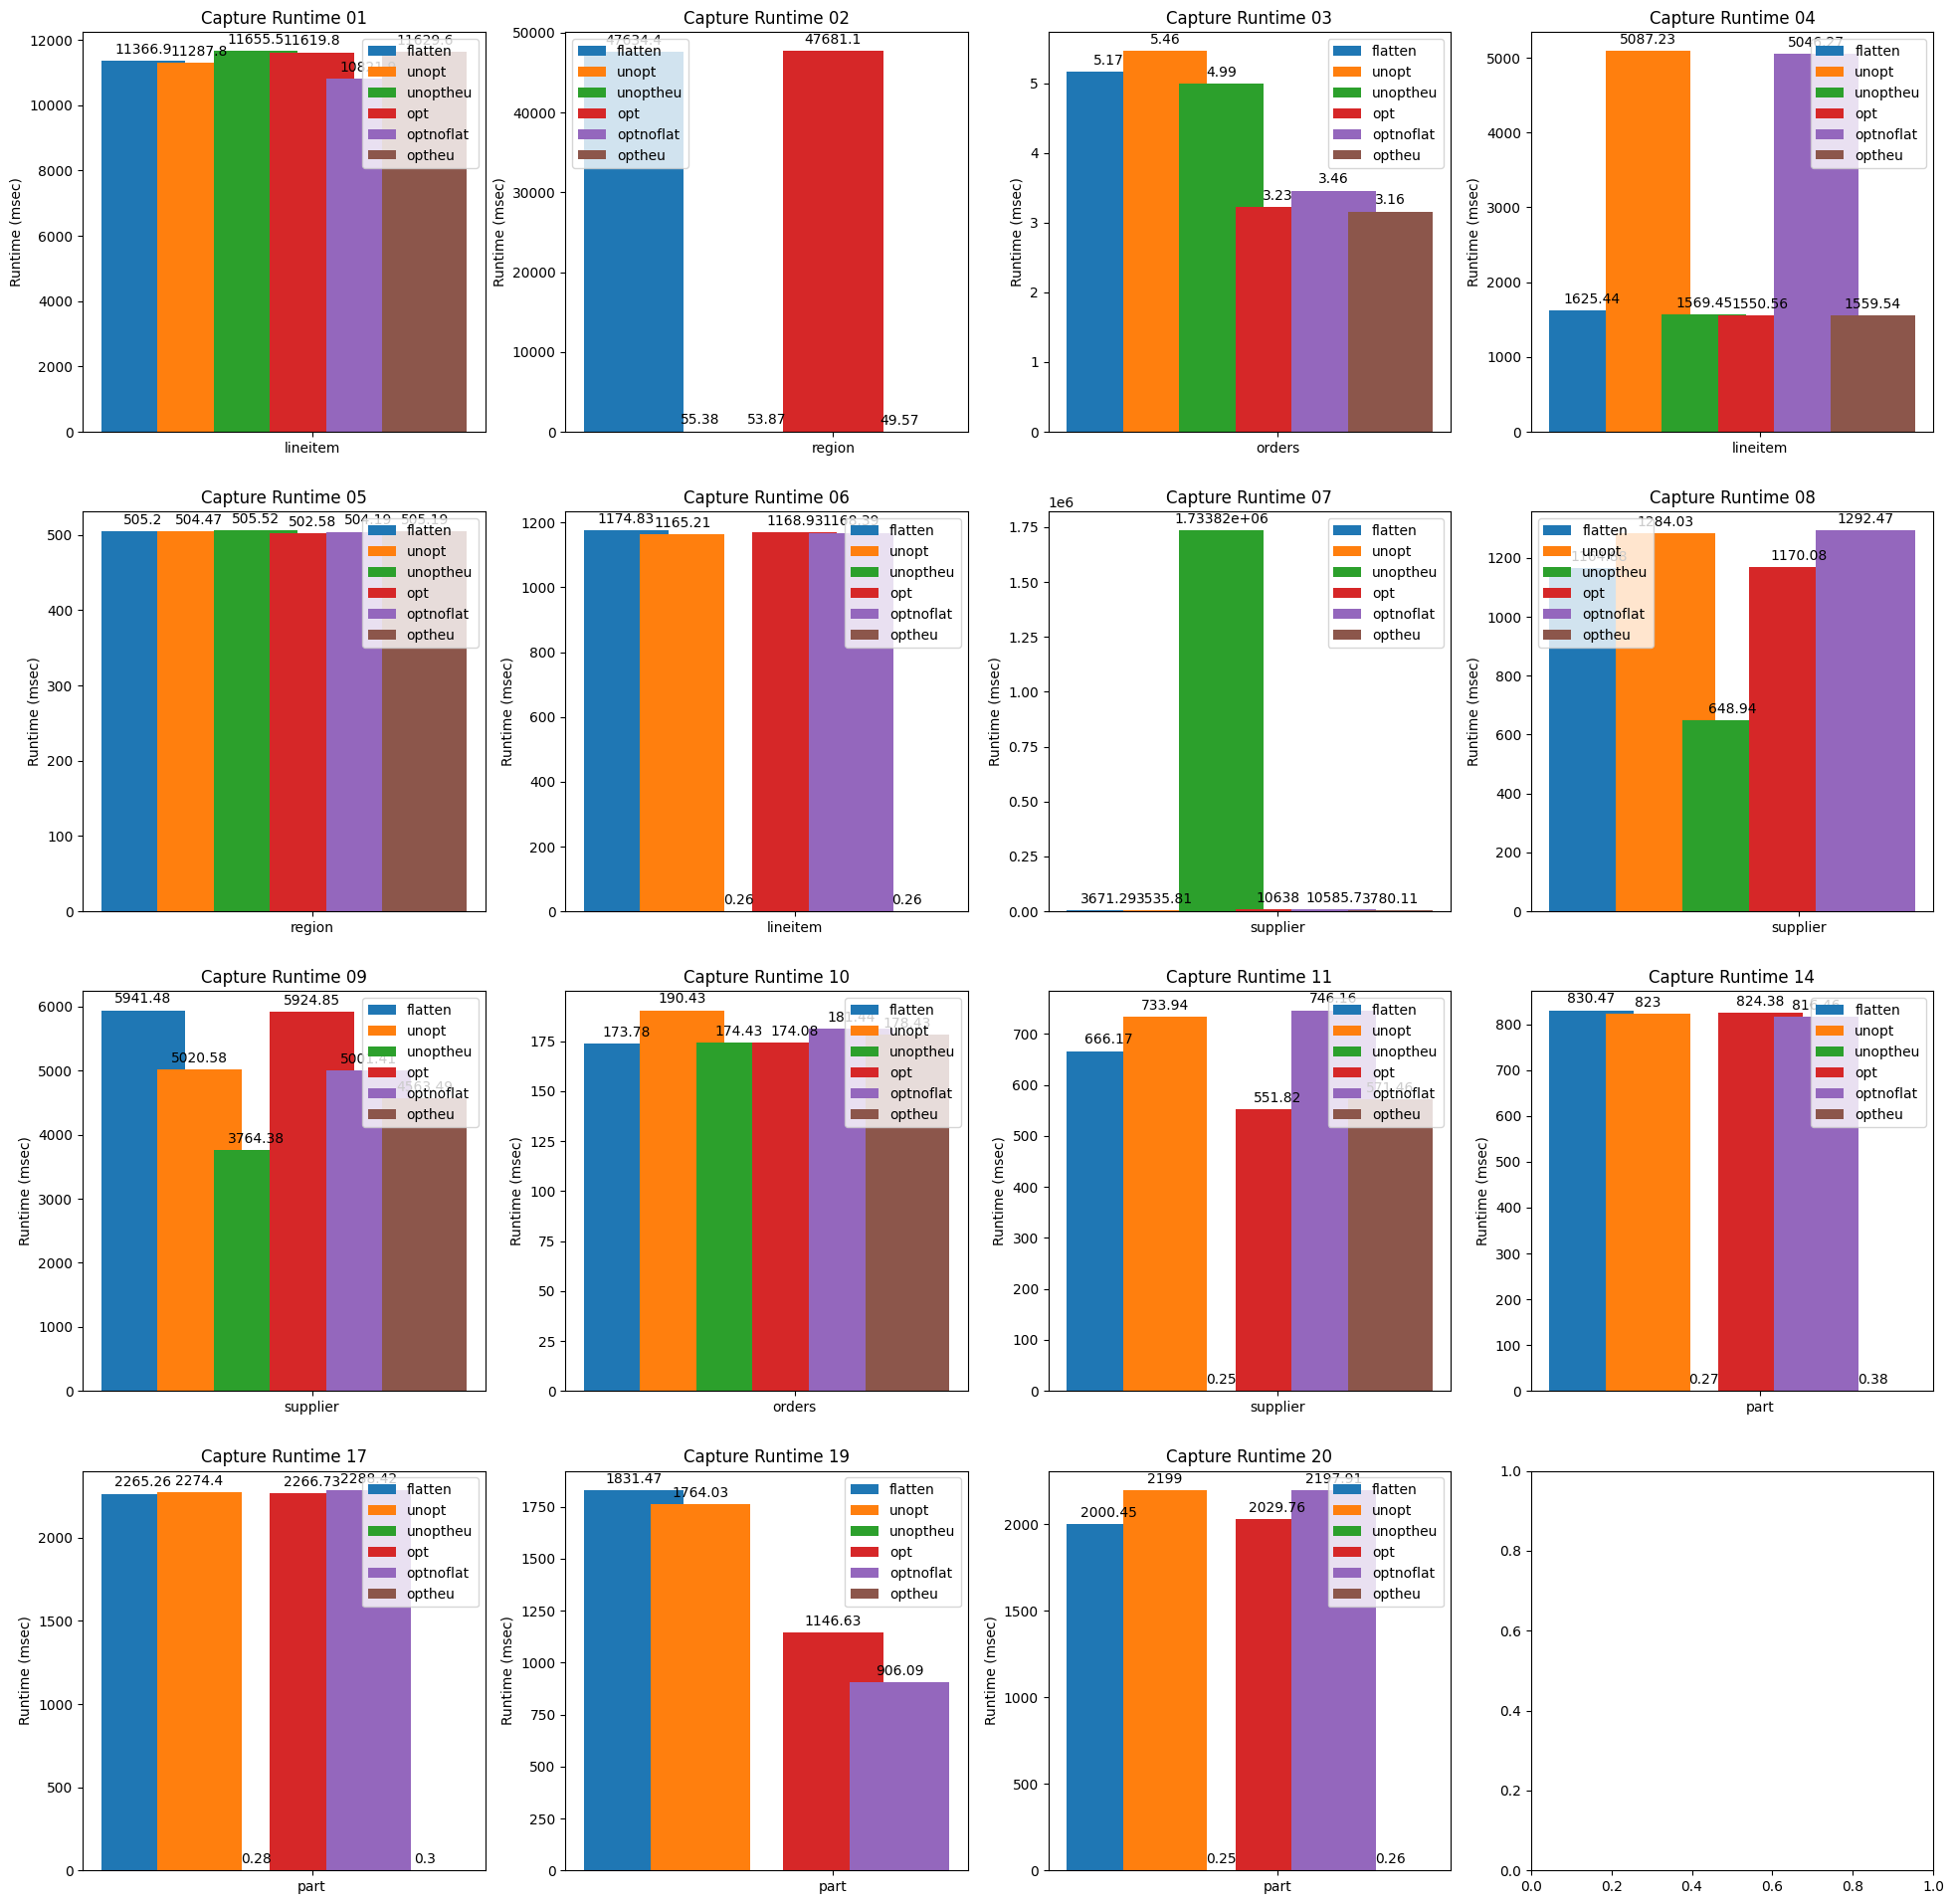

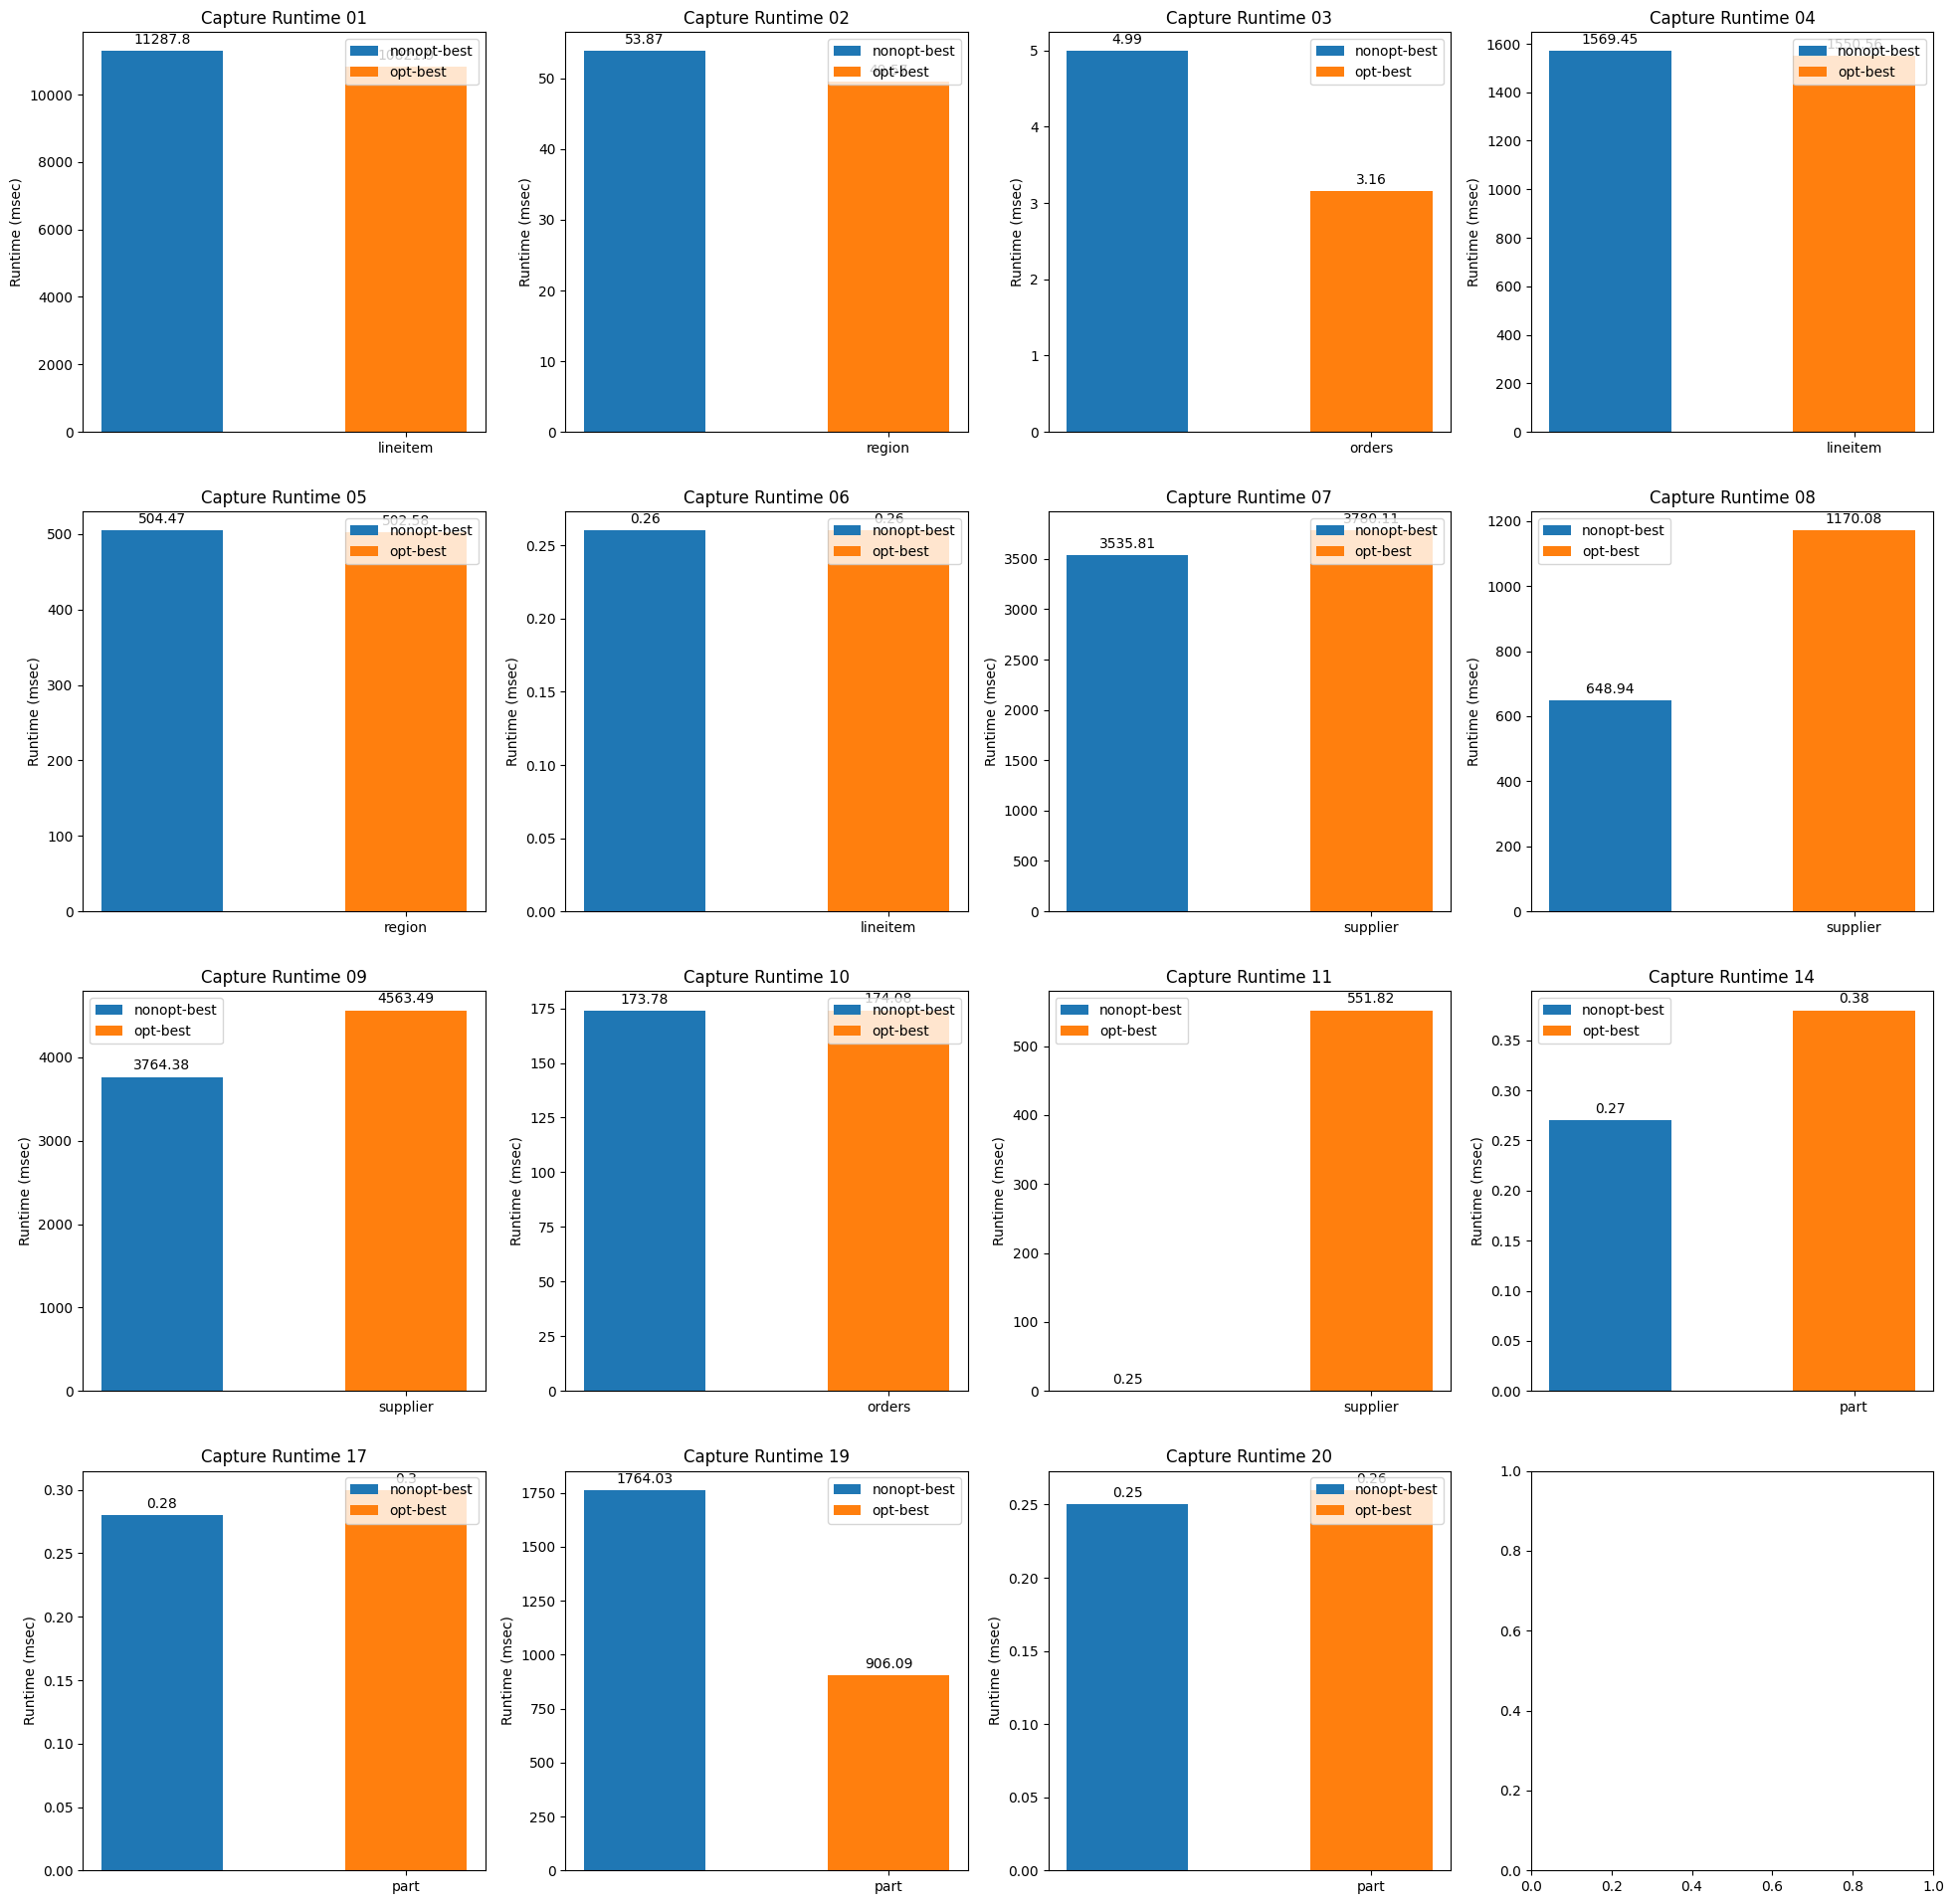

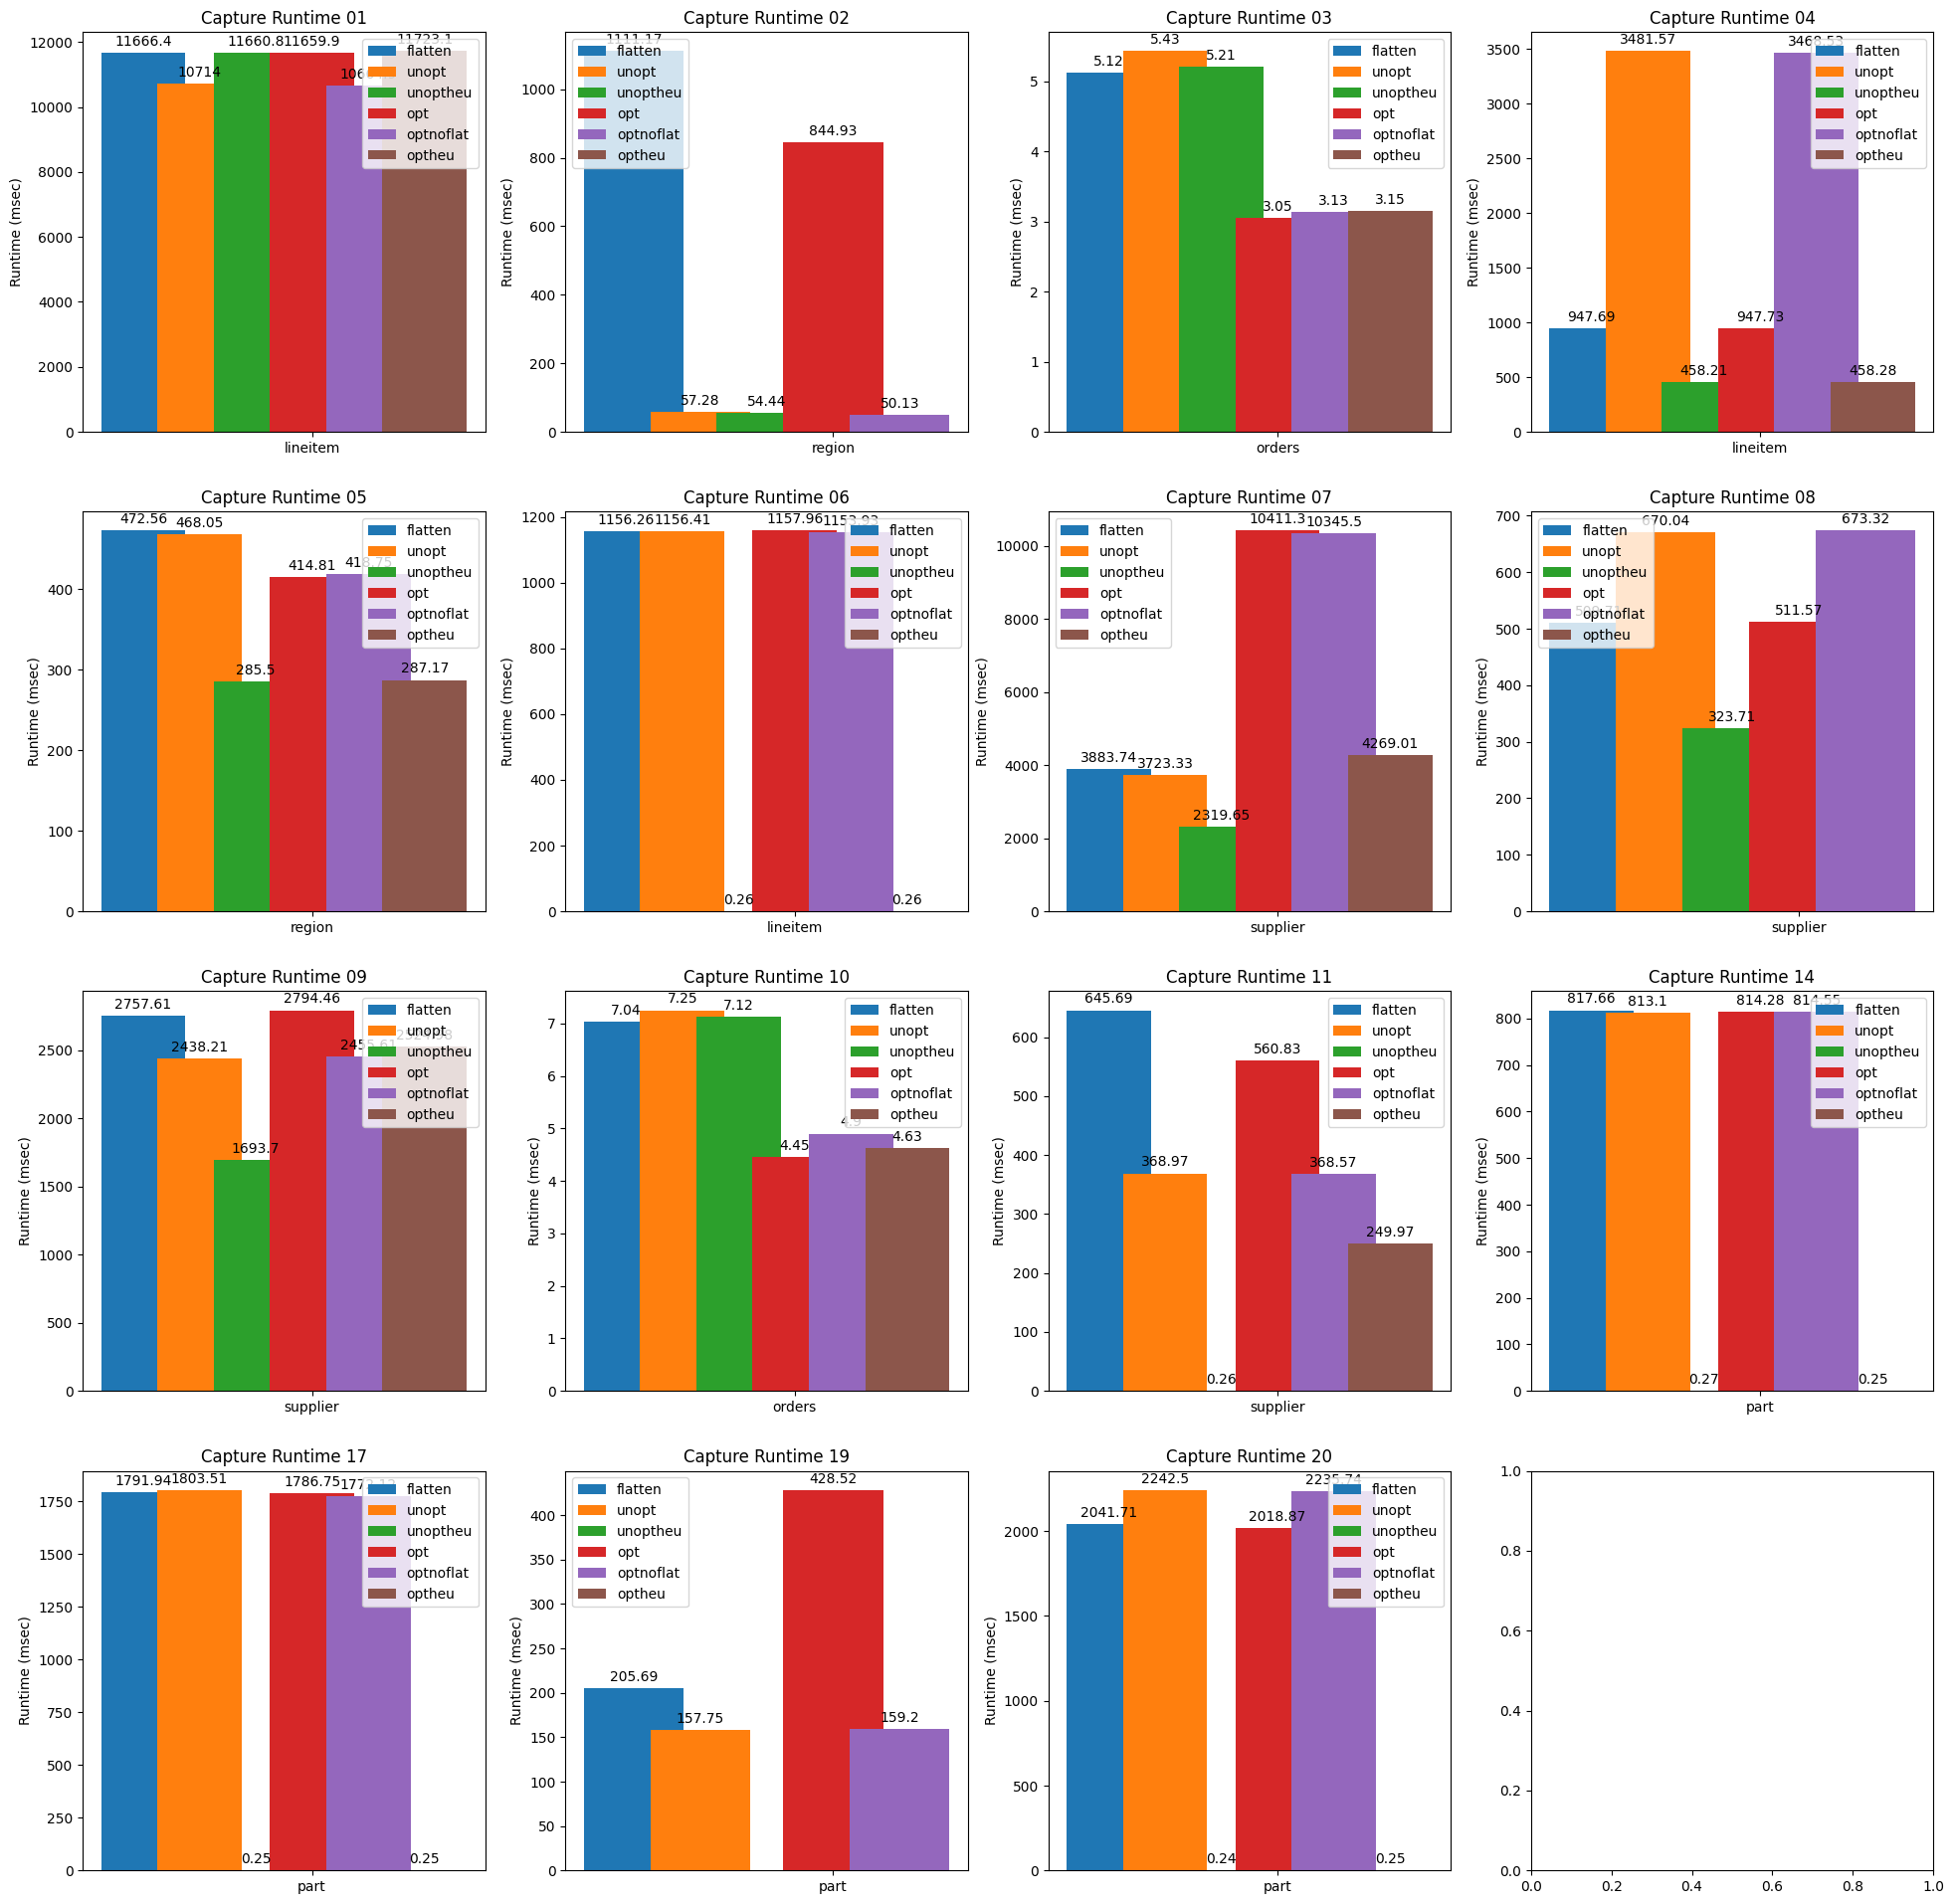

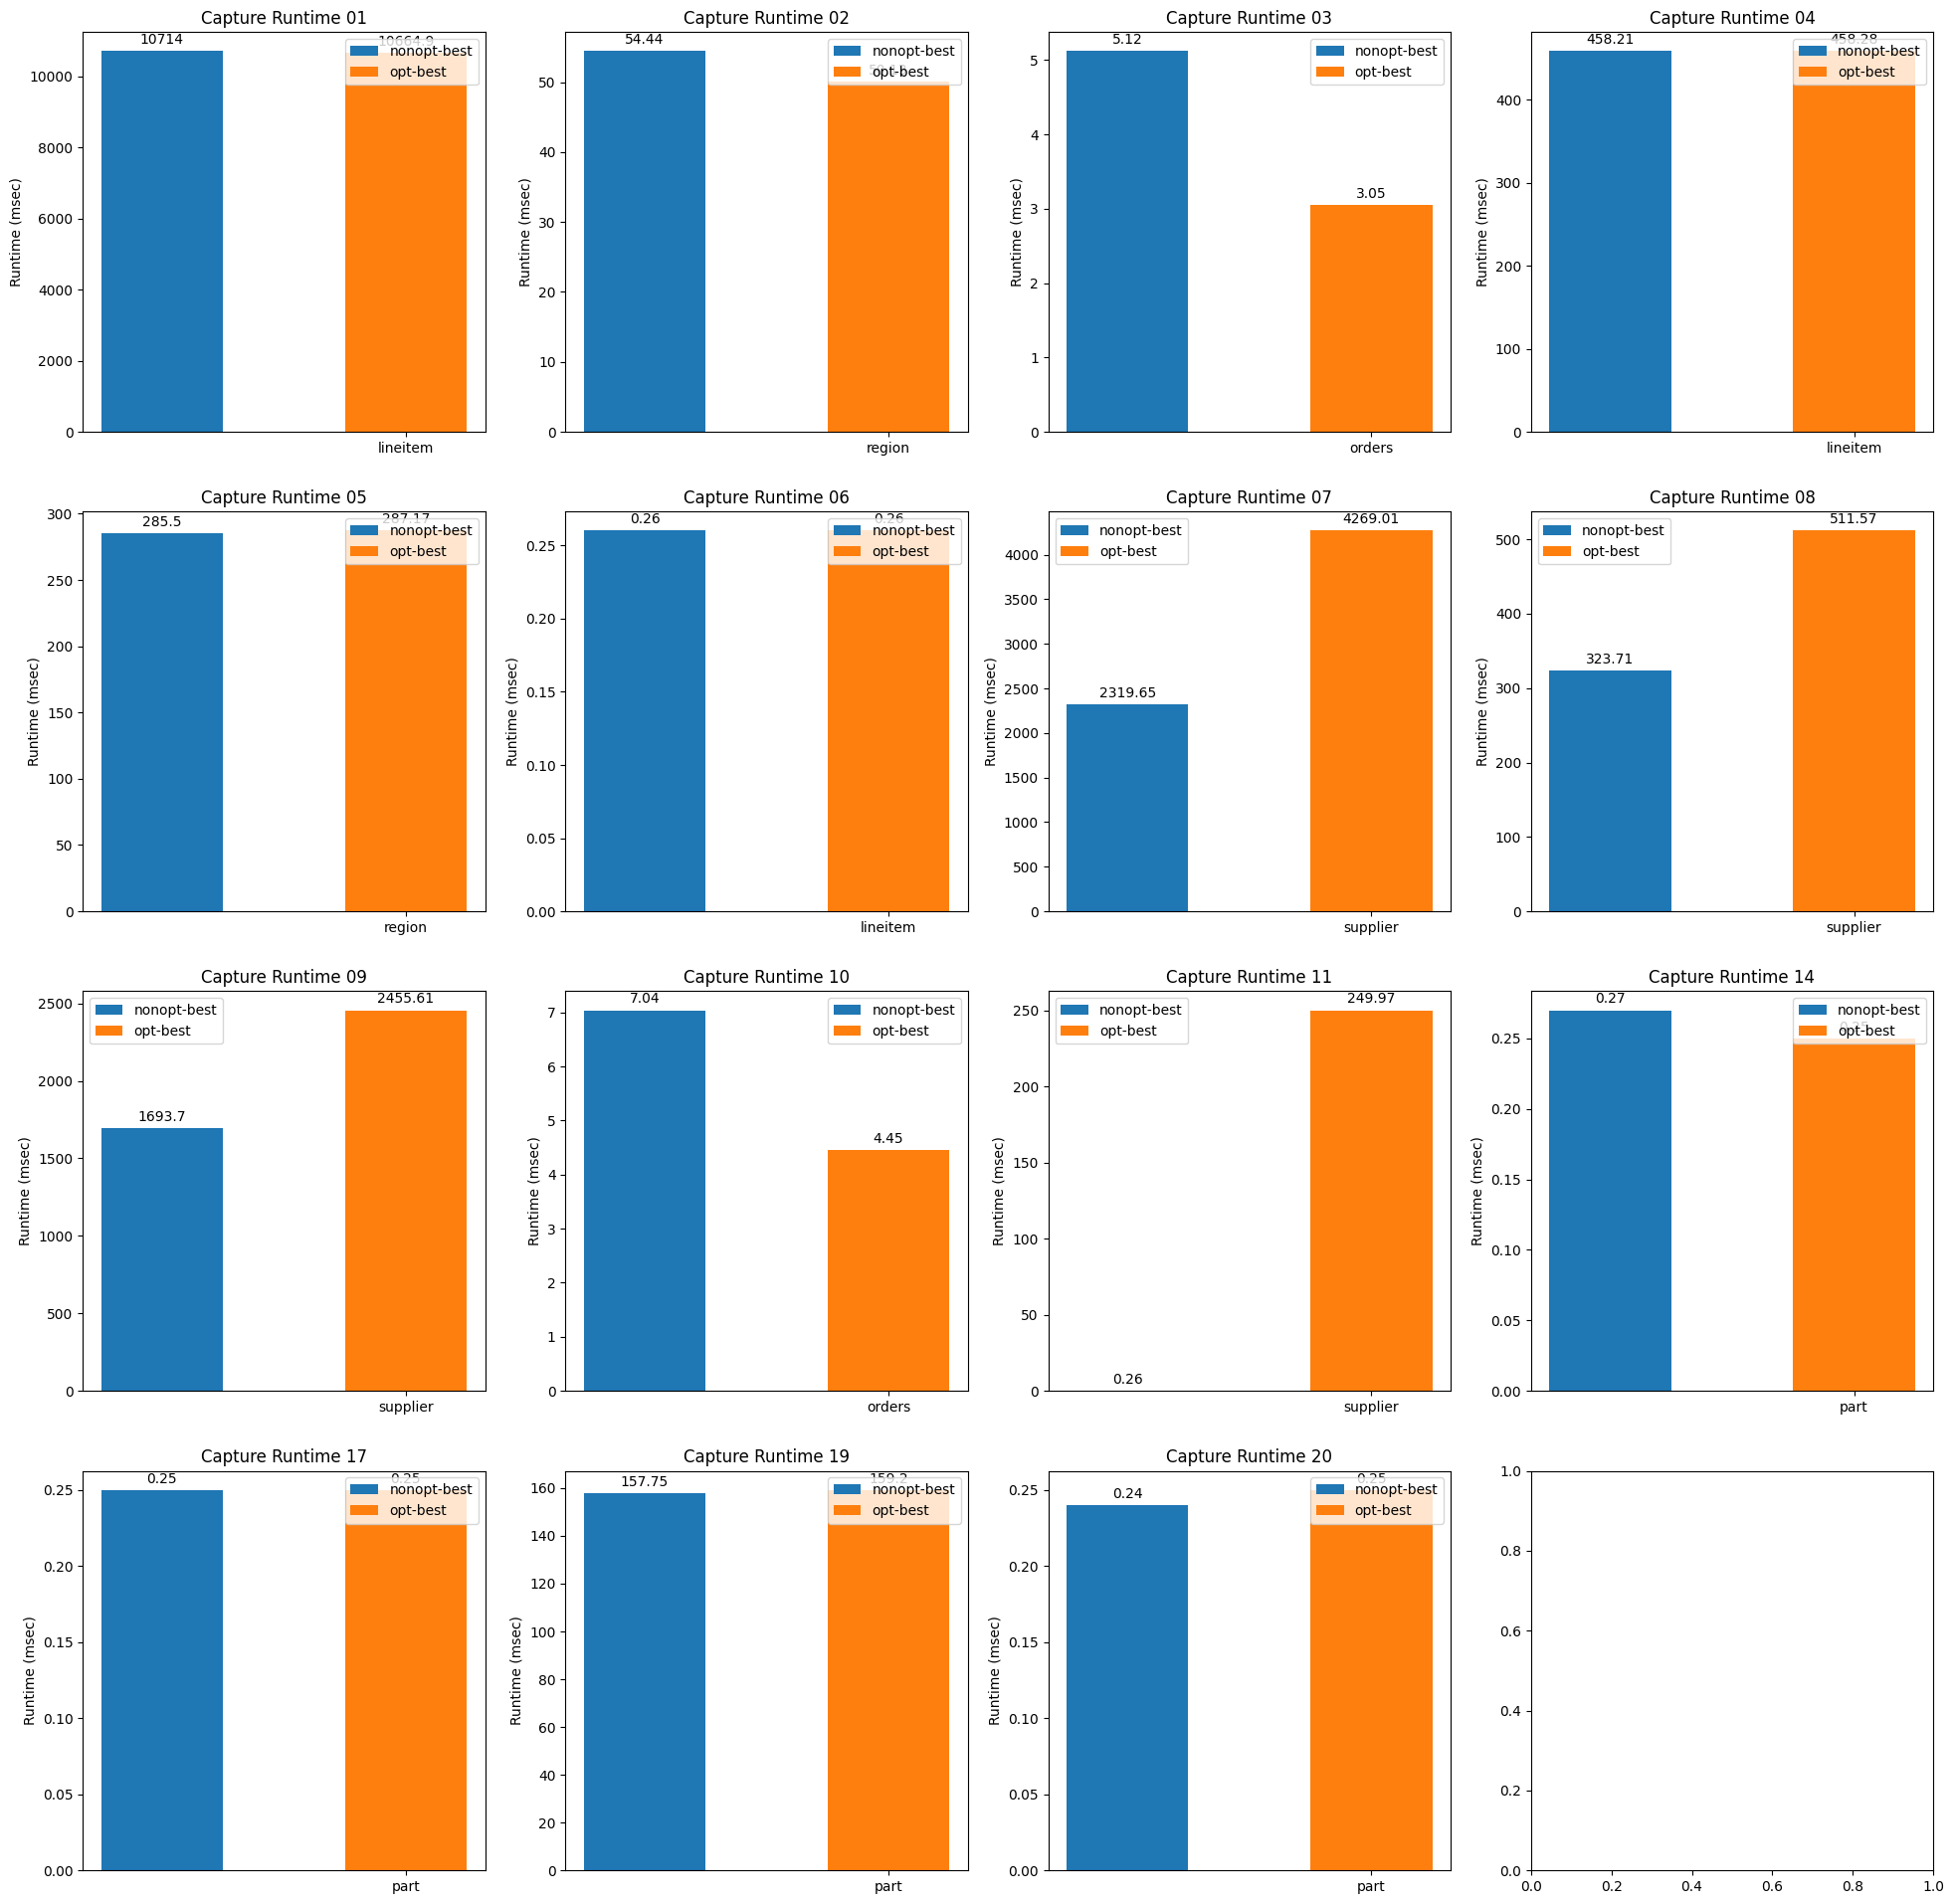

In [44]:
def experiment_plot(d,i,n,edfs,isbest):
    x, y = 4,4
    scale = 6
    plotfile = f'qplots_D{d}_N{n}_I{i}_{"best_for_opt_and_unopt" if isbest else "allmethods"}.pdf'
    plt.rcParams["figure.figsize"] = [scale * x, scale * y]
    fig, axs = plt.subplots(y,x)
    axs = [ item for a in axs for item in a ]
    for qpos, q in enumerate(allqueries):
        plotquery(q, edfs[q], axs[qpos])
    if os.path.exists(plotfile):
        os.remove(plotfile)
    plt.savefig(plotfile, format='pdf')

for d in dbsizes:
    for i in index:
        for n in resultsizes:
            for b in [ False, True ]:
                edfs = bestdfs[d][i][n] if b else dfs[d][i][n]
                experiment_plot(d,i,n, edfs,b)

print("created plots")                
